<a href="https://colab.research.google.com/github/chito365/2023/blob/main/AI_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset 1 1
mnist = tf.keras.datasets.mnist

# train_images = X_train
# train_labels = y_train
# test_images = X_test
# test_labels = y_test

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
# a single image array (28x28):
print(X_train[0].shape)
#print(X_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
(28, 28)


In [ ]:
from cv2 import resize

# Loop through the images, resize them to 16x16

X_train_res16 = []
for image in X_train:
    resized_image = resize(image, (16, 16))
    X_train_res16.append(resized_image)
X_train_res16 = np.array(X_train_res16)

X_test_res16 = []
for image in X_test:
    resized_image = resize(image, (16, 16))
    X_test_res16.append(resized_image)
X_test_res16 = np.array(X_test_res16)

print(X_train_res16.shape)
print(X_test_res16.shape)

(60000, 16, 16)
(10000, 16, 16)


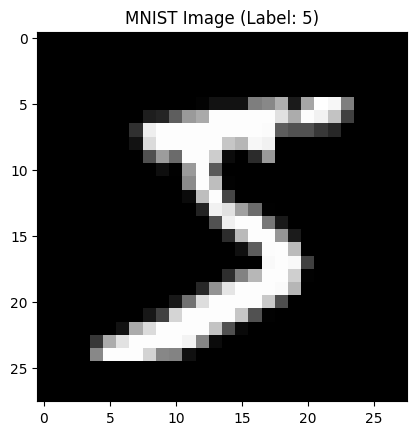

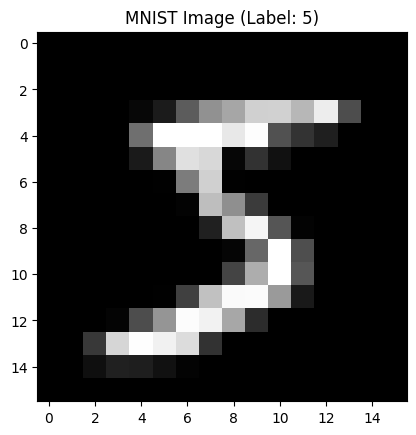

In [ ]:
image_index = 0  # Change this to the index of the image you want to display
# Extract and display the selected image
image = X_train[image_index]
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.title(f"MNIST Image (Label: {y_train[image_index]})")
#plt.axis('off')  # Hide axis labels
plt.show()

image = X_train_res16[image_index]
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.title(f"MNIST Image (Label: {y_train[image_index]})")
#plt.axis('off')  # Hide axis labels
plt.show()

In [ ]:
# Flatten the original images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat.shape)
print(X_test_flat.shape)
#print(X_train_flat[0])

(60000, 784)
(10000, 784)


In [ ]:
# Flatten the resized images
X_train_res16_flat = X_train_res16.reshape(X_train_res16.shape[0], -1)
X_test_res16_flat = X_test_res16.reshape(X_test_res16.shape[0], -1)
print(X_train_res16_flat.shape)
print(X_test_res16_flat.shape)

(60000, 256)
(10000, 256)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding - needed for NN
print(y_train[0])
y_train_ohe = to_categorical(y_train, 10)
y_test_ohe = to_categorical(y_test, 10)
print(y_train_ohe[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:

# Create a simple feedforward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1435 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1051 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9747
Test accuracy: 0.9746999740600586


In [ ]:
# Create a simple feedforward neural network model
model = Sequential([
    Flatten(input_shape=(16, 16)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train_res16, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss2, test_accuracy2 = model.evaluate(X_test_res16, y_test_ohe)
print(f"Test accuracy: {test_accuracy2}")

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8930
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1985 - accuracy: 0.9430
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1505 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9688
Test accuracy: 0.9688000082969666


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Number of clusters (fuzzy sets)
num_clusters = 10

# Perform k-means clustering to generate fuzzy sets
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(x_train)

# Generate fuzzy membership values based on distance to cluster centers
fuzzy_memberships = kmeans.transform(x_train)

# Create fuzzy rules
def create_fuzzy_rules(memberships):
    rules = []
    for sample in memberships:
        rule = np.argmax(sample)  # Select the cluster with the highest membership
        rules.append(rule)
    return np.array(rules)

fuzzy_rules = create_fuzzy_rules(fuzzy_memberships)

# Make predictions using fuzzy rules
def fuzzy_predict(fuzzy_rules, memberships):
    predictions = []
    for i in range(len(fuzzy_rules)):
        predictions.append(np.argmax(memberships[i] == fuzzy_rules[i]))
    return np.array(predictions)

# Apply fuzzy logic classifier to the test data
test_fuzzy_memberships = kmeans.transform(x_test)
y_pred = fuzzy_predict(fuzzy_rules, test_fuzzy_memberships)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: ignored

In [ ]:
#Naomy
#KNN
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn_predict(X_train, y_train, X_test, k):
    num_test = X_test.shape[0]
    y_pred = np.zeros(num_test, dtype=int)

    for i in range(num_test):
        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred[i] = np.argmax(np.bincount(nearest_labels))

    return y_pred

# Load the MNIST dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Make predictions using KNN
k = 5  # Number of neighbors
y_pred = knn_predict(X_train, y_train, X_test, k)

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9861111111111112
